$$
\begin{aligned}
\begin{array}{|c|c|c|c|}
\hline
\textbf{Dataset}    & \textbf{Class} & \textbf{# of Trace}  & \textbf{# of unique} & \textbf{%unique} \\ \hline
{\textbf{BPIC17}}   & L+             & 16.506               & 529                  & 3.2\%              \\ 
                    & L-             & 15.003               & 2.101                & 14\%   \\ \hline
{\textbf{BPIC18}}   & L+             & 27.966               & 1.081                & 3.9\%   \\ 
                    & L-             & 15.843               & 477                  & 3.0\%   \\ \hline
{\textbf{Traffic}}  & L+             & 67.201               & 122                  & 0.2\%   \\ 
                    & L-             & 83.169               & 109                  & 0.1\%   \\ \hline
{\textbf{COVID}}    & L+             & 136                  & 33                   & 24\%   \\ 
                    & L-             & 60                   & 20                   & 33\%   \\ \hline
{\textbf{Hospital}} & L+             & 41.343               & 306                  & 0.7\%   \\ 
                    & L-             & 58.653               & 884                  & 1.5\%   \\ \hline
\end{array}
\end{aligned}
$$

## Imports & Constants

In [1]:
# Import modules every time before running a cell
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

from src.preprocessing import load_split_data_as_df, construct_train_data
from src.visualization.feature_importance import model_coef, tree_mdi, tree_permutation, tree_mdi_permutation
from src.visualization.eda import analyse_data, plot_unique_events_per_trace_location, plot_cumulative_dist_of_traces, plot_hist_by_attr
from src.utils import print_info, print_warning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

DATA_DIR = "../data/"
SPLIT_BY = 'unique'

# <font color='green'> <b> Analysis of dataset</b> </font>

## <font color='green'> <b> BPIC17 </b> </font>

In [2]:
DATASET = 'BPIC17'

# Load data and convert to pandas DataFrame
df_lm_train, df_lm_test, df_lp_train, df_lp_test = load_split_data_as_df(data_dir=DATA_DIR, dataset=DATASET, split_by=SPLIT_BY)

# Group by event names to get traces
lm_traces_train = df_lm_train[['concept:name', "case:concept:name"]].groupby('case:concept:name').agg(','.join)['concept:name']
lp_traces_train = df_lp_train[['concept:name', "case:concept:name"]].groupby('case:concept:name').agg(','.join)['concept:name']
lm_traces_test = df_lm_test[['concept:name', "case:concept:name"]].groupby('case:concept:name').agg(','.join)['concept:name']
lp_traces_test = df_lp_test[['concept:name', "case:concept:name"]].groupby('case:concept:name').agg(','.join)['concept:name']

[INFO]Loading 'BPIC17' dataset from '../data/train_test_splits_unique'...


parsing log, completed traces ::   0%|          | 0/10477 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/631 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/14941 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/159 [00:00<?, ?it/s]

In [3]:
display(df_lm_train.head(2))
print_info(f"L- Train, shape: {df_lm_train.shape}")

display(df_lp_train.head(2))
print_info(f"L+ Train, shape: {df_lp_train.shape}")

display(df_lm_test.head(2))
print_info(f"L- Test, shape: {df_lm_test.shape}")

display(df_lp_test.head(2))
print_info(f"L+ Test, shape: {df_lp_test.shape}")

,Action,EventID,EventOrigin,org:resource,time:timestamp,lifecycle:transition,concept:name,OfferedAmount,CreditScore,Selected,MonthlyCost,Accepted,NumberOfTerms,FirstWithdrawalAmount,OfferID,case:LoanGoal,case:concept:name,case:RequestedAmount,case:ApplicationType
0,Created,Application_652823628,Application,User_1,2016-01-01 10:51:15.304000+01:00,complete,A_Create Application,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Existing loan takeover,Application_652823628,20000.0,New credit
1,statechange,ApplState_1582051990,Application,User_1,2016-01-01 10:51:15.352000+01:00,complete,A_Submitted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Existing loan takeover,Application_652823628,20000.0,New credit


L- Train, shape: (169155, 19)


,Action,EventID,EventOrigin,org:resource,time:timestamp,lifecycle:transition,concept:name,OfferedAmount,CreditScore,Selected,MonthlyCost,Accepted,NumberOfTerms,FirstWithdrawalAmount,OfferID,case:LoanGoal,case:concept:name,case:RequestedAmount,case:ApplicationType
0,Created,Application_1691306052,Application,User_1,2016-01-01 11:16:11.500000+01:00,complete,A_Create Application,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home improvement,Application_1691306052,10000.0,New credit
1,statechange,ApplState_284636842,Application,User_1,2016-01-01 11:16:11.549000+01:00,complete,A_Submitted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home improvement,Application_1691306052,10000.0,New credit


L+ Train, shape: (169151, 19)


,Action,EventID,EventOrigin,org:resource,time:timestamp,lifecycle:transition,concept:name,OfferedAmount,CreditScore,Selected,MonthlyCost,Accepted,NumberOfTerms,FirstWithdrawalAmount,OfferID,case:LoanGoal,case:concept:name,case:RequestedAmount,case:ApplicationType
0,Created,Application_1825972191,Application,User_1,2016-01-02 12:06:39.120000+01:00,complete,A_Create Application,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Car,Application_1825972191,15000.0,New credit
1,statechange,ApplState_539772237,Application,User_1,2016-01-02 12:06:39.156000+01:00,complete,A_Submitted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Car,Application_1825972191,15000.0,New credit


L- Test, shape: (14153, 19)


,Action,EventID,EventOrigin,org:resource,time:timestamp,lifecycle:transition,concept:name,OfferedAmount,CreditScore,Selected,MonthlyCost,Accepted,NumberOfTerms,FirstWithdrawalAmount,OfferID,case:LoanGoal,case:concept:name,case:RequestedAmount,case:ApplicationType
0,Created,Application_196483749,Application,User_17,2016-01-02 10:12:07.481000+01:00,complete,A_Create Application,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Car,Application_196483749,10000.0,New credit
1,statechange,ApplState_369764295,Application,User_17,2016-01-02 10:12:07.505000+01:00,complete,A_Concept,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Car,Application_196483749,10000.0,New credit


L+ Test, shape: (2958, 19)


          L-     L+
count  10477  14941
mean      16     11
std        3      2
min       10      7
50%       15     11
75%       18     12
99%       30     21
max       51     45


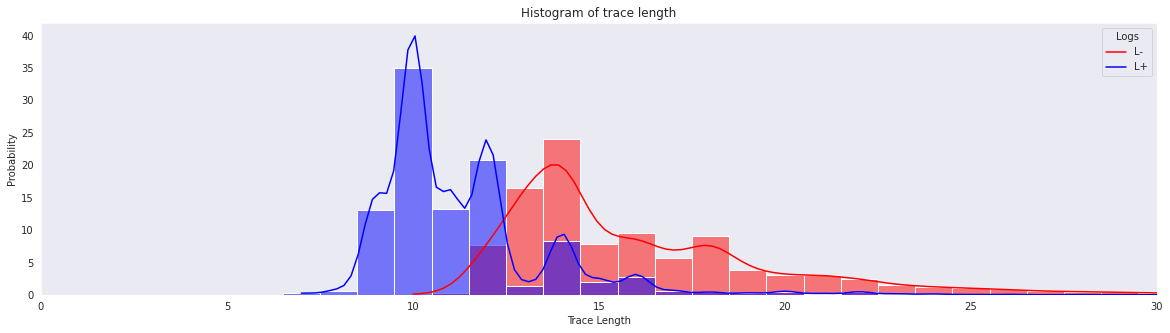

Unique event names in: 
Lminus(18 events): 
['A_Create Application' 'A_Submitted' 'A_Concept' 'A_Accepted'
 'O_Create Offer' 'O_Created' 'O_Sent (mail and online)' 'A_Complete'
 'A_Validating' 'O_Returned' 'A_Incomplete' 'O_Accepted' 'A_Pending'
 'O_Cancelled' 'A_Cancelled' 'A_Denied' 'O_Refused' 'O_Sent (online only)'] 

Lplus(17 events): 
['A_Create Application' 'A_Submitted' 'A_Concept' 'A_Accepted'
 'O_Create Offer' 'O_Created' 'O_Sent (mail and online)' 'A_Complete'
 'A_Validating' 'A_Denied' 'O_Refused' 'A_Cancelled' 'O_Cancelled'
 'O_Returned' 'O_Accepted' 'A_Pending' 'O_Sent (online only)'] 

Their difference in terms of events: 
{'A_Incomplete'}


In [4]:
analyse_data(df_lm_train, df_lp_train, xlim=[0, 30])

        L-   L+
count  631  159
mean    22   18
std      5    5
min     11    7
50%     22   18
75%     25   22
99%     37   38
max     50   40


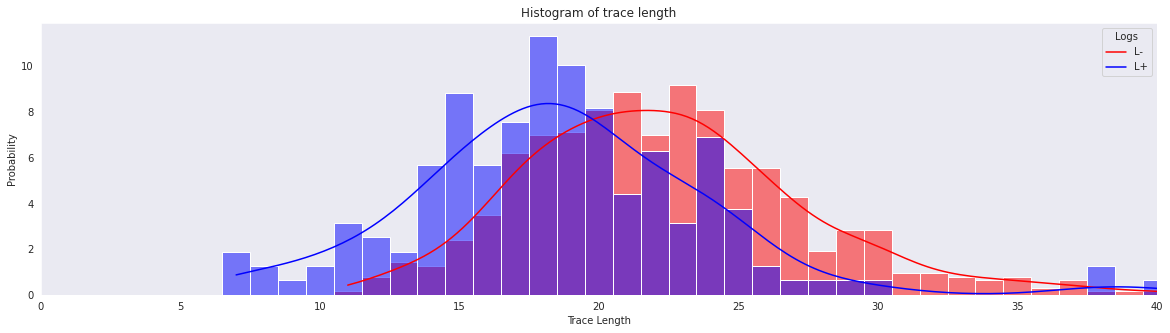

Unique event names in: 
Lminus(18 events): 
['A_Create Application' 'A_Submitted' 'A_Concept' 'A_Accepted'
 'O_Create Offer' 'O_Created' 'O_Sent (mail and online)' 'A_Complete'
 'O_Sent (online only)' 'A_Validating' 'O_Returned' 'A_Incomplete'
 'O_Accepted' 'A_Pending' 'O_Cancelled' 'A_Cancelled' 'A_Denied'
 'O_Refused'] 

Lplus(17 events): 
['A_Create Application' 'A_Concept' 'A_Accepted' 'O_Create Offer'
 'O_Created' 'O_Sent (online only)' 'A_Complete' 'O_Cancelled'
 'O_Sent (mail and online)' 'A_Cancelled' 'A_Validating' 'O_Returned'
 'O_Accepted' 'A_Pending' 'A_Submitted' 'A_Denied' 'O_Refused'] 

Their difference in terms of events: 
{'A_Incomplete'}


In [5]:
analyse_data(df_lm_test, df_lp_test, xlim=[0, 40])

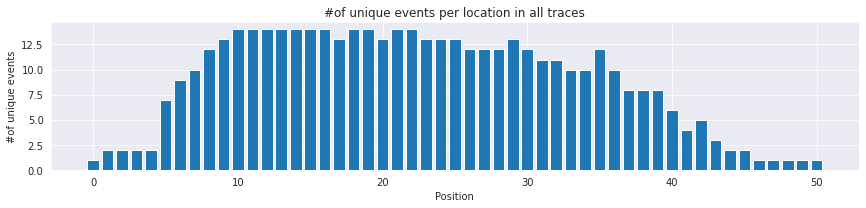

In [6]:
plot_unique_events_per_trace_location(lm_traces_train, lm_traces_test, 
                                      lp_traces_train, lp_traces_test)

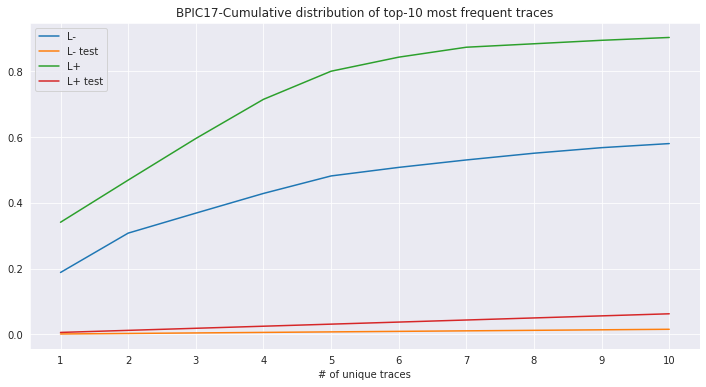

In [7]:
plot_cumulative_dist_of_traces(lm_traces_train, lm_traces_test, 
                               lp_traces_train, lp_traces_test,
                               dataset=DATASET, top_k=10)

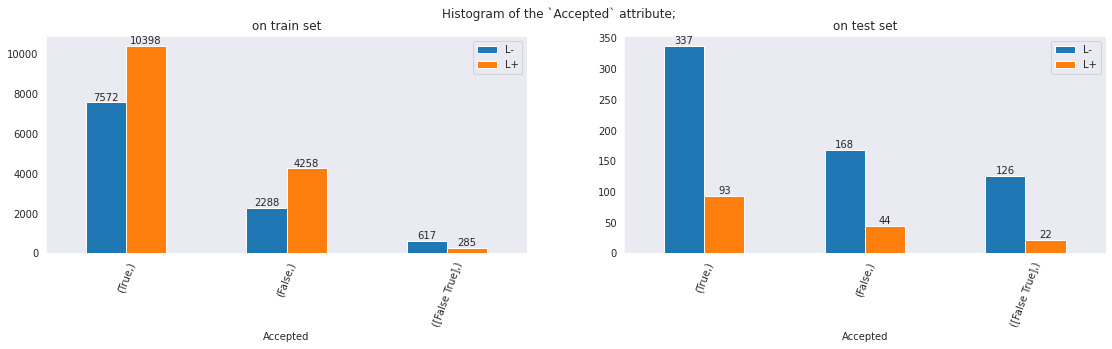

In [8]:
plot_hist_by_attr(df_lm_train, df_lm_test,
                  df_lp_train, df_lp_test, "Accepted")

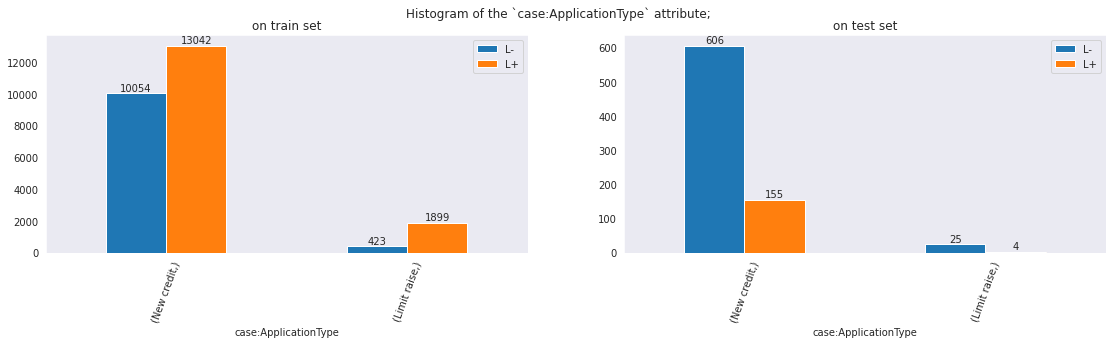

In [9]:
plot_hist_by_attr(df_lm_train, df_lm_test,
                  df_lp_train, df_lp_test, "case:ApplicationType")

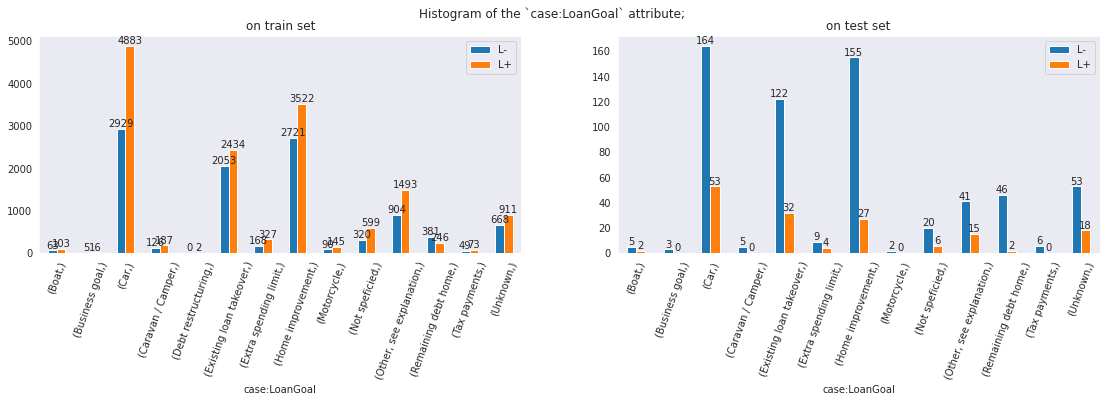

In [10]:
plot_hist_by_attr(df_lm_train, df_lm_test,
                  df_lp_train, df_lp_test, "case:LoanGoal")

In [11]:
# Might need to add the following features:
#     "OfferedAmount", "CreditScore", "Selected", "MonthlyCost", "Accepted", "NumberOfTerms", "case:RequestedAmount"
df_lm_train["Accepted"].unique()

array([nan, True, False], dtype=object)

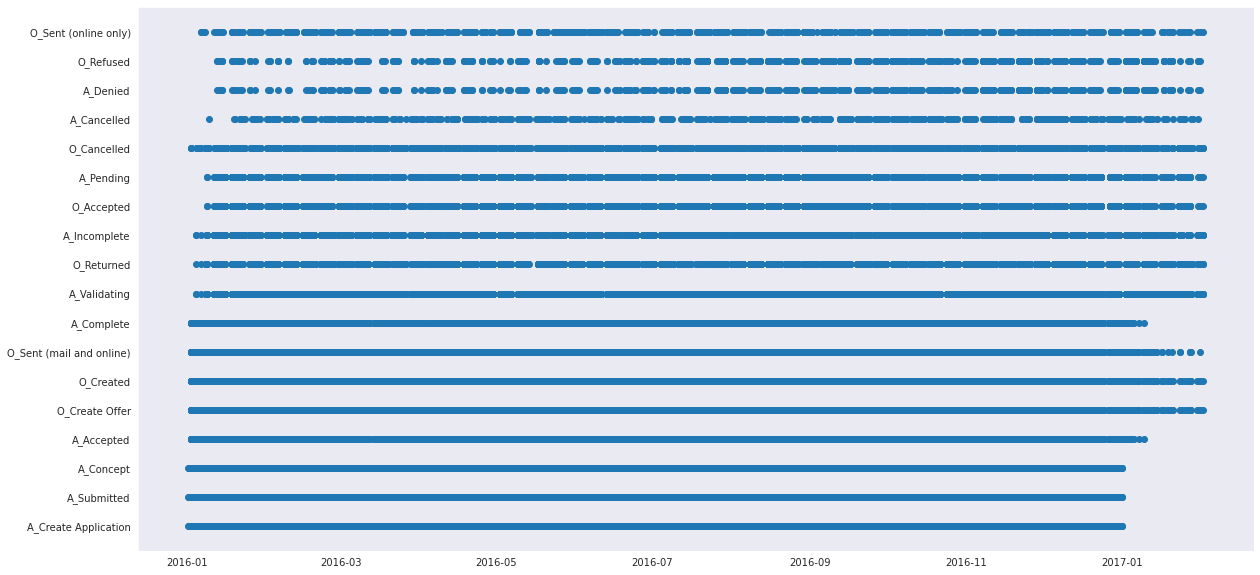

In [12]:
plt.figure(figsize=((20, 10)))
plt.scatter(df_lm_train['time:timestamp'], df_lm_train['concept:name'])

In [13]:
for i in df_lm_train.columns:
    print(df_lm_train[i].value_counts(), "\n")

statechange    143444
Created         25711
Name: Action, dtype: int64 

Application_652823628    1
ApplState_1716219498     1
ApplState_1353885841     1
ApplState_2100491119     1
OfferState_424977058     1
                        ..
ApplState_1931536907     1
ApplState_1685300099     1
ApplState_841572291      1
Offer_292789670          1
ApplState_769143185      1
Name: EventID, Length: 169155, dtype: int64 

Application    97159
Offer          71996
Name: EventOrigin, dtype: int64 

User_1      21710
User_29      3647
User_123     3601
User_118     3562
User_27      3068
            ...  
User_141        7
User_82         5
User_144        4
User_103        4
User_142        3
Name: org:resource, Length: 144, dtype: int64 

2016-10-24 07:14:13.906000+02:00    2
2016-12-23 09:52:46.707000+01:00    2
2016-01-01 10:51:15.304000+01:00    1
2016-09-29 09:39:19.088000+02:00    1
2016-09-29 09:39:55.384000+02:00    1
                                   ..
2016-06-02 11:51:21.419000+02:00  

## <font color='green'> <b> BPIC18 </b> </font>

In [ ]:
DATASET = 'BPIC18'

# Load data and convert to pandas DataFrame
df_lm_train, df_lm_test, df_lp_train, df_lp_test = load_split_data_as_df(data_dir=DATA_DIR, dataset=DATASET, split_by=SPLIT_BY)

# Group by event names to get traces
lm_traces_train = df_lm_train[['concept:name', "case:concept:name"]].groupby('case:concept:name').agg(','.join)['concept:name']
lp_traces_train = df_lp_train[['concept:name', "case:concept:name"]].groupby('case:concept:name').agg(','.join)['concept:name']
lm_traces_test = df_lm_test[['concept:name', "case:concept:name"]].groupby('case:concept:name').agg(','.join)['concept:name']
lp_traces_test = df_lp_test[['concept:name', "case:concept:name"]].groupby('case:concept:name').agg(','.join)['concept:name']

In [ ]:
display(df_lm_train.head(2))
print_info(f"L- Train, shape: {df_lm_train.shape}")

display(df_lp_train.head(2))
print_info(f"L+ Train, shape: {df_lp_train.shape}")

display(df_lm_test.head(2))
print_info(f"L- Test, shape: {df_lm_test.shape}")

display(df_lp_test.head(2))
print_info(f"L+ Test, shape: {df_lp_test.shape}")

In [ ]:
analyse_data(df_lm_train, df_lp_train, xlim=[0, 30])

In [ ]:
analyse_data(df_lm_test, df_lp_test, xlim=[0, 40])

In [ ]:
plot_unique_events_per_trace_location(lm_traces_train, lm_traces_test, 
                                      lp_traces_train, lp_traces_test)

In [ ]:
plot_cumulative_dist_of_traces(lm_traces_train, lm_traces_test, 
                               lp_traces_train, lp_traces_test,
                               dataset=DATASET, top_k=10)

In [ ]:
plot_hist_by_attr(df_lm_train, df_lm_test,
                  df_lp_train, df_lp_test, "case:department")

In [ ]:
plt.figure(figsize=((20, 10)))
plt.scatter(df_lm_train['time:timestamp'], df_lm_train['concept:name'])

In [ ]:
for i in df_lm_train.columns:
    print(df_lm_train[i].value_counts(), "\n")

## <font color='green'> <b> Traffic </b> </font>

In [ ]:
DATASET = 'Traffic'

# Load data and convert to pandas DataFrame
df_lm_train, df_lm_test, df_lp_train, df_lp_test = load_split_data_as_df(data_dir=DATA_DIR, dataset=DATASET, split_by=SPLIT_BY)

# Group by event names to get traces
lm_traces_train = df_lm_train[['concept:name', "case:concept:name"]].groupby('case:concept:name').agg(','.join)['concept:name']
lp_traces_train = df_lp_train[['concept:name', "case:concept:name"]].groupby('case:concept:name').agg(','.join)['concept:name']
lm_traces_test = df_lm_test[['concept:name', "case:concept:name"]].groupby('case:concept:name').agg(','.join)['concept:name']
lp_traces_test = df_lp_test[['concept:name', "case:concept:name"]].groupby('case:concept:name').agg(','.join)['concept:name']

In [ ]:
display(df_lm_train.head(2))
print_info(f"L- Train, shape: {df_lm_train.shape}")

display(df_lp_train.head(2))
print_info(f"L+ Train, shape: {df_lp_train.shape}")

display(df_lm_test.head(2))
print_info(f"L- Test, shape: {df_lm_test.shape}")

display(df_lp_test.head(2))
print_info(f"L+ Test, shape: {df_lp_test.shape}")

In [ ]:
analyse_data(df_lm_train, df_lp_train, xlim=[0, 15])

In [ ]:
analyse_data(df_lm_test, df_lp_test, xlim=[0, 15])

In [ ]:
plot_unique_events_per_trace_location(lm_traces_train, lm_traces_test, 
                                      lp_traces_train, lp_traces_test)

In [ ]:
plot_cumulative_dist_of_traces(lm_traces_train, lm_traces_test, 
                               lp_traces_train, lp_traces_test,
                               dataset=DATASET, top_k=10)

In [ ]:
plt.figure(figsize=((20, 10)))
plt.scatter(df_lm_train['time:timestamp'], df_lm_train['concept:name'])

In [ ]:
for i in df_lm_train.columns:
    print(df_lm_train[i].value_counts(), "\n")

## <font color='green'> <b> COVID </b> </font>

In [ ]:
DATASET = 'COVID'

# Load data and convert to pandas DataFrame
df_lm_train, df_lm_test, df_lp_train, df_lp_test = load_split_data_as_df(data_dir=DATA_DIR, dataset=DATASET, split_by=SPLIT_BY)

# Group by event names to get traces
lm_traces_train = df_lm_train[['concept:name', "case:concept:name"]].groupby('case:concept:name').agg(','.join)['concept:name']
lp_traces_train = df_lp_train[['concept:name', "case:concept:name"]].groupby('case:concept:name').agg(','.join)['concept:name']
lm_traces_test = df_lm_test[['concept:name', "case:concept:name"]].groupby('case:concept:name').agg(','.join)['concept:name']
lp_traces_test = df_lp_test[['concept:name', "case:concept:name"]].groupby('case:concept:name').agg(','.join)['concept:name']

In [ ]:
display(df_lm_train.head(2))
print_info(f"L- Train, shape: {df_lm_train.shape}")

display(df_lp_train.head(2))
print_info(f"L+ Train, shape: {df_lp_train.shape}")

display(df_lm_test.head(2))
print_info(f"L- Test, shape: {df_lm_test.shape}")

display(df_lp_test.head(2))
print_info(f"L+ Test, shape: {df_lp_test.shape}")

In [ ]:
analyse_data(df_lm_train, df_lp_train, xlim=[1, 13])

In [ ]:
analyse_data(df_lm_test, df_lp_test, xlim=[1, 13])

In [ ]:
plot_unique_events_per_trace_location(lm_traces_train, lm_traces_test, 
                                      lp_traces_train, lp_traces_test)

In [ ]:
plot_cumulative_dist_of_traces(lm_traces_train, lm_traces_test, 
                               lp_traces_train, lp_traces_test,
                               dataset=DATASET, top_k=10)

In [ ]:
plot_hist_by_attr(df_lm_train, df_lm_test,
                  df_lp_train, df_lp_test, "Age")

In [ ]:
plot_hist_by_attr(df_lm_train, df_lm_test,
                  df_lp_train, df_lp_test, "Sex")

In [ ]:
plot_hist_by_attr(df_lm_train, df_lm_test,
                  df_lp_train, df_lp_test, "Group")

In [ ]:
plt.figure(figsize=((20, 10)))
plt.scatter(df_lm_train['time:timestamp'], df_lm_train['concept:name'])

In [ ]:
for i in df_lm_train.columns:
    print(df_lm_train[i].value_counts(), "\n")

## <font color='green'> <b> Hospital </b> </font>

In [ ]:
DATASET = 'Hospital'

# Load data and convert to pandas DataFrame
df_lm_train, df_lm_test, df_lp_train, df_lp_test = load_split_data_as_df(data_dir=DATA_DIR, dataset=DATASET, split_by=SPLIT_BY)

# Group by event names to get traces
lm_traces_train = df_lm_train[['concept:name', "case:concept:name"]].groupby('case:concept:name').agg(','.join)['concept:name']
lp_traces_train = df_lp_train[['concept:name', "case:concept:name"]].groupby('case:concept:name').agg(','.join)['concept:name']
lm_traces_test = df_lm_test[['concept:name', "case:concept:name"]].groupby('case:concept:name').agg(','.join)['concept:name']
lp_traces_test = df_lp_test[['concept:name', "case:concept:name"]].groupby('case:concept:name').agg(','.join)['concept:name']

In [ ]:
display(df_lm_train.head(2))
print_info(f"L- Train, shape: {df_lm_train.shape}")

display(df_lp_train.head(2))
print_info(f"L+ Train, shape: {df_lp_train.shape}")

display(df_lm_test.head(2))
print_info(f"L- Test, shape: {df_lm_test.shape}")

display(df_lp_test.head(2))
print_info(f"L+ Test, shape: {df_lp_test.shape}")

In [ ]:
df_lp_test.columns

In [ ]:
analyse_data(df_lm_train, df_lp_train, xlim=[0, 40])

In [ ]:
analyse_data(df_lm_test, df_lp_test, xlim=[0, 40])

In [ ]:
plot_unique_events_per_trace_location(lm_traces_train, lm_traces_test, 
                                      lp_traces_train, lp_traces_test)

In [ ]:
plot_cumulative_dist_of_traces(lm_traces_train, lm_traces_test, 
                               lp_traces_train, lp_traces_test,
                               dataset=DATASET, top_k=10)

In [ ]:
plot_hist_by_attr(df_lm_train, df_lm_test,
                  df_lp_train, df_lp_test, "flagD")

In [ ]:
plot_hist_by_attr(df_lm_train, df_lm_test,
                  df_lp_train, df_lp_test, "actRed")

In [ ]:
plot_hist_by_attr(df_lm_train, df_lm_test,
                  df_lp_train, df_lp_test, "speciality")

In [ ]:
plt.figure(figsize=((20, 10)))
plt.scatter(df_lm_train['time:timestamp'], df_lm_train['concept:name'])

In [ ]:
for i in df_lm_train.columns:
    print(df_lm_train[i].value_counts(), "\n")

# <font color='green'> <b> Process Model Discovery </b> </font>

In [ ]:
import pm4py
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner

### Covid

In [ ]:
# Load an example log
log_lm = pm4py.read_xes(f"{DATA_DIR}COVID/Lm_final.xes")
log_lp = pm4py.read_xes(f"{DATA_DIR}COVID/Lp_final.xes")

# Discover models for both logs
model_lm = pm4py.discover_bpmn_inductive(log_lm)
pm4py.view_bpmn(model_lm)

model_lp = pm4py.discover_bpmn_inductive(log_lp)
pm4py.view_bpmn(model_lp)

In [ ]:
'Alpha Miner'
# Apply the algorithm
net, initial_marking, final_marking = alpha_miner.apply(log_lm)
# Visualize the petri net
pm4py.view_petri_net(net, initial_marking=initial_marking, final_marking=final_marking)

### Traffic

In [ ]:
# Load an example log
log = pm4py.read_xes(f"{DATA_DIR}Traffic/Lm_final.xes")
# Discover model
model = pm4py.discover_bpmn_inductive(log)
pm4py.view_bpmn(model)

In [ ]:
'Alpha Miner'
# Apply the algorithm
net, initial_marking, final_marking = alpha_miner.apply(log)
# Visualize the petri net
pm4py.view_petri_net(net, initial_marking=initial_marking, final_marking=final_marking)

In [ ]:
'Inductive Miner'
# Apply the algorithm
net, initial_marking, final_marking = inductive_miner.apply(log)
# Visualize the petri net
pm4py.view_petri_net(net, initial_marking=initial_marking, final_marking=final_marking)

In [ ]:
'Heuristics Miner'
# Apply the algorithm
net, initial_marking, final_marking = heuristics_miner.apply(log)
# Visualize the petri net
pm4py.view_petri_net(net, initial_marking=initial_marking, final_marking=final_marking)

In [ ]:
'Visualize Process Tree'
tree = inductive_miner.apply_tree(log)
gviz = pt_visualizer.apply(tree)
pt_visualizer.view(gviz)

tree = inductive_miner.apply_tree(log, variant=inductive_miner.Variants.IMf)
gviz = pt_visualizer.apply(tree)
pt_visualizer.view(gviz)